# Author: Janki Panchal

## Task 2: Prediction using Unsupervised ML

### GRIP(JAN2021): THE SPARKS FOUNDATION

*From the given dataset, I am gonna predict the optimum number of clusters and represent it visually.*

Dataset:https://bit.ly/3kXTdox

*About Iris dataset: The Iris flower dataset or Fisher's Iris dataset is a multivariate dataset introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 as an example of linear discriminant analysis. The dataset contains a set of 150 records under five attributes - sepal length, sepal width, petal length, petal width and species. Iris data set gives the measurements in centimetres of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris. The species are Iris setosa, versicolor, and virginica.*

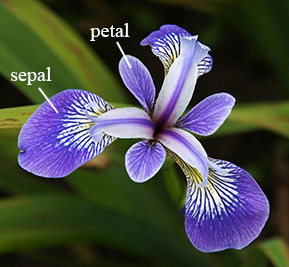

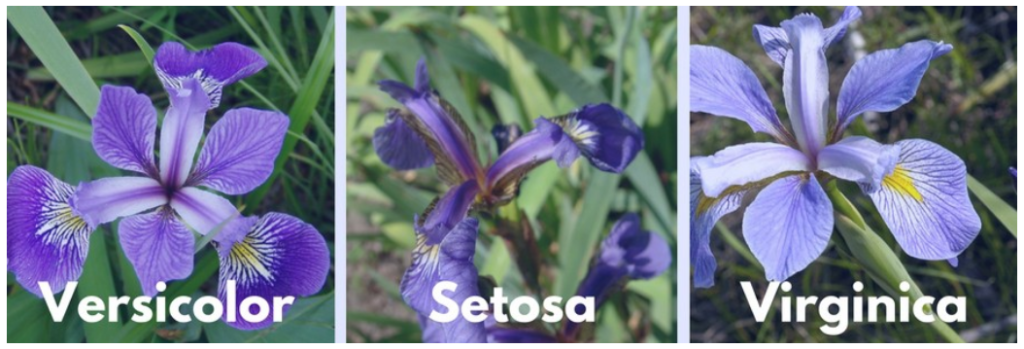

**Step 1: Import required libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

**Step 2: Import dataset**

In [2]:
data=pd.read_csv(r"C:\Users\panch\Desktop\Data\Iris.csv")
print("Data imported successfully!")
data

Data imported successfully!


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


**Step 3: Learn data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


*From above information I can say that there's no null value in the dataset so there's no need of data Cleaning* 

In [5]:
#statistical description of data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Step 4: Data Visualization**

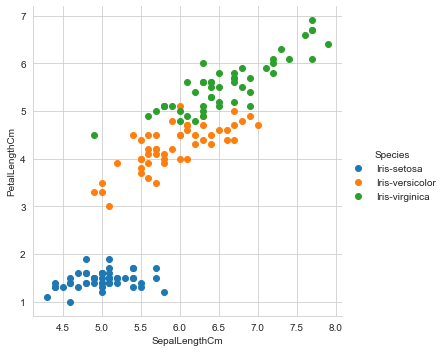

In [7]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue ="Species",height = 5).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()

*From data visualization, I can see that there's some data points that are to be grouped in some places. And for that next I'm using K-Means algorithm for Cluster Analysis, so from that I can obtain a valid result of the data being clustered at some places.*

**Step 5: Clustering using K-Means Algorithm**

In [8]:
#importing required library for k-means ML algo
from sklearn.cluster import KMeans

In [9]:
#seleccting data by label
x = data.iloc[:, [0, 1, 2, 3]].values

In [10]:
#calculating distance between each data point and cluster centers
sum_of_squared_distance = []
K = range(1,10)
optimalK = 1
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(x)
  sum_of_squared_distance.append(km.inertia_)
  if k > 1:
    ratio = sum_of_squared_distance[k-1]/sum_of_squared_distance[k-2]
    if ratio < 0.55:
      optimalK = k
print("Optimal Number of Clusters =",optimalK)

Optimal Number of Clusters = 3


**Step 6: Visual Representation of Optimal number of clusters using elbow method**

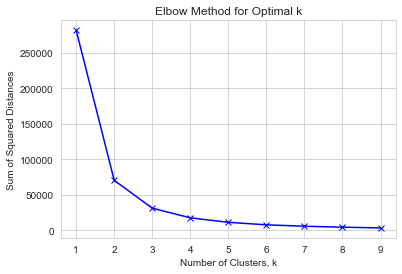

In [15]:
# Plotting Elbow Graph
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

*From the above grapgh, I can visualize that Optimal clusters is where the elbow occurs. Thus this is the point when the within cluster sum of squares does not decrease significantly with every iteration.*

Therefore, there are 3 clusters for this dataset.

**Step 7: Apply K-means to the dataset**

In [16]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)
kmeans.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

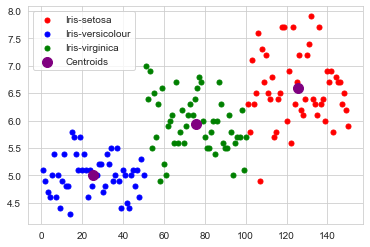

In [27]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 100, c = 'purple', label = 'Centroids')
plt.legend()

### Conclusion:
#### I can conclude that the Iris data set is divided into 3 clusters by not only using the k-means algorithm but also visually.